This is script enables visualization of the effects Conservation Practices (NRS) have on Nitrogen Load.
Acknowledgement: The NRS document refers to Nitrate-N concentration loss. Our current model calculates Nitrogen Surplus instead of Nitrogen Concentration. Currently, we assume that the change in % Nitrate-N is the same change for % Nitrogen Surplus. 


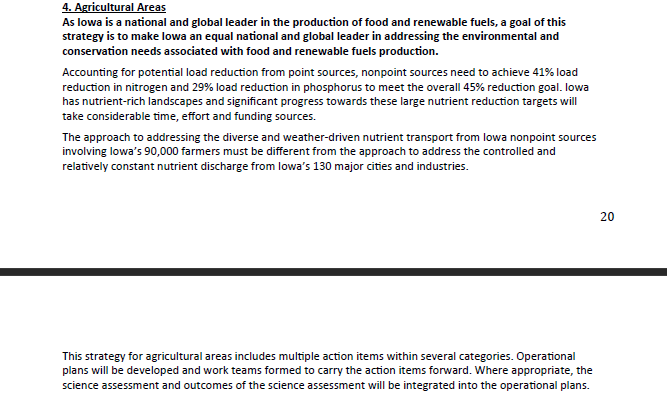

### 0. Libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
import re

import textwrap

import IPython.display
from IPython.display import display, clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

import plotly.graph_objects as go

### 1. Get data

In [2]:
df_ifew = pd.read_csv('NRS_IFEWs.csv')
df_pract = pd.read_csv('NRS_py_conservation.csv')

In [3]:
df_pract

,Practice,Names List,Comments,% AVG Nitrate-N Reduction+,% Corn Yield Change++
0,Timing,Moving from Fall to Spring Pre-plant Application,Moving from Fall to Spring Pre-plant Application,6,4
1,Timing,Spring pre-plant/sidedress 40-60 split Compare...,Spring pre-plant/sidedress 40-60 split Compare...,5,10
2,Timing,Sidedress - Compared to Pre-plant Application,Sidedress - Compared to Pre-plant Application,7,0
3,Timing,Sidedress - Soil Test Based Compared to Pre-plant,Sidedress - Soil Test Based Compared to Pre-plant,4,13
4,Source,Liquid Swine Manure Compared to Spring-Applied...,Liquid Swine Manure Compared to Spring-Applied...,4,0
5,Source,Poultry Manure Compared to Spring Applied Fert...,Poultry Manure Compared to Spring Applied Fert...,-3,-2
6,Nitrogen Application Rate,Reduce to Maximum Return to Nitrogen value 14...,Reduce to Maximum Return to Nitrogen value 14...,10,-1
7,Nitrification Inhibitor,Nitrapyrin in Fall - Compared to Fall- Applied...,Nitrapyrin in Fall - Compared to Fall- Applied...,9,6
8,Cover Crops,Rye,Rye,31,-6
9,Cover Crops,Oat,Oat,28,-5


### 2. Organize data format

In [4]:
# No need of silage values
df_ifew = df_ifew.drop(['CornSilageAcresHarvested','CornSilageYield_tonspacre'], axis = 1)

# Deal with Nan values
df_ifew.isna().sum()

CountyName                  0
BeefCows                    0
Hogs                        0
MilkCows                    0
OtherCattle                 0
CornAcresPlanted           25
CornGrainAcresHarvested    25
CornGrainYield_bupacre     25
SoybeansAcresHarvested     33
SoybeansAcresPlanted       33
SoybeansYield_bupacre      33
Year                        0
CommercialN_kg_ha           0
ManureN_kg_ha               0
GrainN_kg_ha                0
GrainN_neg_kg_ha            0
FixatedN_kg_ha              0
NitrogenSurplus_kg_ha       0
dtype: int64

In [5]:
# Calculate based on other around year values
df_ifew = df_ifew.fillna(method = "bfill")

# Deal with Nan values
df_ifew.isna().sum()

CountyName                 0
BeefCows                   0
Hogs                       0
MilkCows                   0
OtherCattle                0
CornAcresPlanted           0
CornGrainAcresHarvested    0
CornGrainYield_bupacre     0
SoybeansAcresHarvested     0
SoybeansAcresPlanted       0
SoybeansYield_bupacre      0
Year                       0
CommercialN_kg_ha          0
ManureN_kg_ha              0
GrainN_kg_ha               0
GrainN_neg_kg_ha           0
FixatedN_kg_ha             0
NitrogenSurplus_kg_ha      0
dtype: int64

In [6]:
df_pract = df_pract.replace(to_replace=r'^-$', value=0, regex=True)

for i in range(len(df_pract)):
    df_pract['Names List'][i] = " ".join(df_pract['Names List'][i].split())

<ipython-input-6-b6e12cbb0d70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pract['Names List'][i] = " ".join(df_pract['Names List'][i].split())


In [7]:
df_pract

,Practice,Names List,Comments,% AVG Nitrate-N Reduction+,% Corn Yield Change++
0,Timing,Moving from Fall to Spring Pre-plant Application,Moving from Fall to Spring Pre-plant Application,6,4
1,Timing,Spring pre-plant/sidedress 40-60 split Compare...,Spring pre-plant/sidedress 40-60 split Compare...,5,10
2,Timing,Sidedress - Compared to Pre-plant Application,Sidedress - Compared to Pre-plant Application,7,0
3,Timing,Sidedress - Soil Test Based Compared to Pre-plant,Sidedress - Soil Test Based Compared to Pre-plant,4,13
4,Source,Liquid Swine Manure Compared to Spring-Applied...,Liquid Swine Manure Compared to Spring-Applied...,4,0
5,Source,Poultry Manure Compared to Spring Applied Fert...,Poultry Manure Compared to Spring Applied Fert...,-3,-2
6,Nitrogen Application Rate,Reduce to Maximum Return to Nitrogen value 149...,Reduce to Maximum Return to Nitrogen value 14...,10,-1
7,Nitrification Inhibitor,Nitrapyrin in Fall - Compared to Fall- Applied...,Nitrapyrin in Fall - Compared to Fall- Applied...,9,6
8,Cover Crops,Rye,Rye,31,-6
9,Cover Crops,Oat,Oat,28,-5


In [8]:
# convert the 'Date' column to datetime format
df_ifew['Year']= pd.to_datetime(df_ifew['Year'])
df_ifew['Year'] = df_ifew['Year'].dt.year

In [9]:
# Create dropdown lists
y_lst = (df_ifew['Year'].unique()).tolist() #year
r_lst = ((df_ifew['CountyName'].unique()).tolist()) # region
r_lst.sort() # alphabeticallly
r_lst.insert(0,'Iowa')
p_lst = (df_pract['Names List']).tolist() #practice
len(r_lst)

100

In [10]:
df_r = df_ifew.loc[df_ifew['Year'] == 2015]
nr_change = df_pract.loc[df_pract['Names List']=='Moving from Fall to Spring Pre-plant Application','% AVG Nitrate-N Reduction+'].item()
df_r
Ns = df_r['NitrogenSurplus_kg_ha'].sum()
Nnew = Ns-((int(nr_change)/100)*Ns)

In [11]:
# Create a function takes the info on the dropdown lists (year, chosen region) and calculates the Nitrogen surplus based on the chosen practice.

def n_ifew(selectedYear, df_ifew, selectedRegion, practice, df_pract, perc):
    # create an Empty DataFrame object
    new_ifew = pd.DataFrame(index=range(3),columns=range(2))
    # Change the column names
    new_ifew.columns = ['Old', 'New']
    # Change the row indexes
    new_ifew.index = ['Total Nitrogen Load [tons]', 'Corn [bushels]', 'Total Area']
        
    # Year selection
    yr = selectedYear
    df_y = df_ifew.loc[df_ifew['Year'] == yr]
    
    # Region Selection
    r = selectedRegion
    df = df_y
    if (r == 'Iowa'):
        df_r = df.sum()
    else:
        df_r = df[df['CountyName'] == r]
        
    # WHAT IF ACCOUNT FOR MULTIPLE PRACTICES?
    nr_change = df_pract.loc[df_pract['Names List']==practice,'% AVG Nitrate-N Reduction+'].item()
    cy_change = df_pract.loc[df_pract['Names List']==practice,'% Corn Yield Change++']  
    
    
    #calculate values produced by query
    if (r == 'Iowa'):
        Ns = df_r['NitrogenSurplus_kg_ha']
        Cy = df_r['CornGrainYield_bupacre']
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
        
        a = Nnew
        b = Cnew  
        
        # total area in hectares of application of nitrogen - do we consider Soybean crops?
        total_area = (df_r['CornAcresPlanted']+ df_r['SoybeansAcresPlanted'])/2.57
        # total area in hectares of application of nitrogen - do we not consider Soybean crops?
        #total_area = (df_r['CornAcresPlanted']/2.57
        
        new_ifew['Old']['Total Nitrogen Load [tons]'] = int(total_area*df_r['NitrogenSurplus_kg_ha']/1000)
        # Nitrogen Load New in metric tons
        new_ifew['New']['Total Nitrogen Load [tons]'] = int(total_area*a/1000)
        # Corn yield Old in bushels
        new_ifew['Old']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*df_r['CornGrainYield_bupacre']))
        # Corn Yield New
        new_ifew['New']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*b))    
        
        
    else:
        Ns = df_r['NitrogenSurplus_kg_ha']
        Cy = df_r['CornGrainYield_bupacre']
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
        
        a = Nnew
        b = Cnew  
        
        # total area in hectares of application of nitrogen - do we consider Soybean crops?
        total_area = (df_r['CornAcresPlanted']+ df_r['SoybeansAcresPlanted'])/2.57
        # total area in hectares of application of nitrogen - do we not consider Soybean crops?
        #total_area = (df_r['CornAcresPlanted']/2.57

        # Nitrogen Load Old in metric tons
        new_ifew['Old']['Total Nitrogen Load [tons]'] = int(float(total_area*df_r['NitrogenSurplus_kg_ha']/1000))
        # Nitrogen Load New in metric tons
        new_ifew['New']['Total Nitrogen Load [tons]'] = int(float(total_area*a/1000))
        # Corn yield Old in bushels
        new_ifew['Old']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*df_r['CornGrainYield_bupacre']))
        # Corn Yield New
        new_ifew['New']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*b))

    
    #percentage Old
    new_ifew['Old']['Total Area'] = 100 
    
    # percentage area
    new_ifew['New']['Total Area'] = perc
    
    
    return new_ifew

In [12]:
trial = (n_ifew(2015, df_ifew, 'Iowa', 'Moving from Fall to Spring Pre-plant Application', df_pract, 50))

In [13]:
trial

,Old,New
Total Nitrogen Load [tons],12138500,11410190
Corn [bushels],251029255519,261070425740
Total Area,100,50


## Define Sliders Widget

## Text Widget

In [14]:
year_slider = widgets.IntSlider(
    min = 2014,
    max = 2019,
    step = 1,
    value=2015,
    description = 'Year',
    Disabled = False)    

area_p = widgets.IntSlider(
    min = 0,
    max = 100,
    step = 1,
    value= 50,
    description = 'Conservation Practice Area Percentage',
    Disabled = False)    

CP = widgets.Dropdown(
    options = p_lst,
    value='Moving from Fall to Spring Pre-plant Application',
    description='Chosen Conservation Practice',
    disabled=False,
)

CR = widgets.Dropdown(
    options = r_lst,
    value='Monroe',
    description='Observed Region',
    disabled=False,
)



#def f(year_slider, area_p, CP, CR):
def f(year_slider, CP, CR):
    # create an Empty DataFrame object
    new_ifew = pd.DataFrame(index=range(3),columns=range(2))
    # Change the column names
    new_ifew.columns = ['Old', 'New']
    # Change the row indexes
    new_ifew.index = ['Total Nitrogen Load [tons]', 'Corn [bushels]', 'Total Area']
        
    # Year selection
    yr = year_slider
    df_y = df_ifew.loc[df_ifew['Year'] == yr]
    
    # Region Selection
    r = CR
    df = df_y
    if (r == 'Iowa'):
        df_r = df.sum()
    else:
        df_r = df[df['CountyName'] == r]
        
    # WHAT IF ACCOUNT FOR MULTIPLE PRACTICES?
    nr_change = df_pract.loc[df_pract['Names List']==CP,'% AVG Nitrate-N Reduction+'].item()
    cy_change = df_pract.loc[df_pract['Names List']==CP,'% Corn Yield Change++']  
    
    
    #calculate values produced by query
    if (r == 'Iowa'):
        Ns = df_r['NitrogenSurplus_kg_ha']
        Cy = df_r['CornGrainYield_bupacre']
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
        
        a = Nnew
        b = Cnew  
        
        # total area in hectares of application of nitrogen - do we consider Soybean crops?
        total_area = (df_r['CornAcresPlanted']+ df_r['SoybeansAcresPlanted'])/2.57
        # total area in hectares of application of nitrogen - do we not consider Soybean crops?
        #total_area = (df_r['CornAcresPlanted']/2.57
        
        new_ifew['Old']['Total Nitrogen Load [tons]'] = int(total_area*df_r['NitrogenSurplus_kg_ha']/1000)
        # Nitrogen Load New in metric tons
        new_ifew['New']['Total Nitrogen Load [tons]'] = int(total_area*a/1000)
        # Corn yield Old in bushels
        new_ifew['Old']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*df_r['CornGrainYield_bupacre']))
        # Corn Yield New
        new_ifew['New']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*b))   
    else:
        Ns = df_r['NitrogenSurplus_kg_ha']
        Cy = df_r['CornGrainYield_bupacre']
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
        
        a = Nnew
        b = Cnew  
        
        # total area in hectares of application of nitrogen - do we consider Soybean crops?
        total_area = (df_r['CornAcresPlanted']+ df_r['SoybeansAcresPlanted'])/2.57
        # total area in hectares of application of nitrogen - do we not consider Soybean crops?
        #total_area = (df_r['CornAcresPlanted']/2.57
        
        new_ifew['Old']['Total Nitrogen Load [tons]'] = int(total_area*df_r['NitrogenSurplus_kg_ha']/1000)
        # Nitrogen Load New in metric tons
        new_ifew['New']['Total Nitrogen Load [tons]'] = int(total_area*a/1000)
        # Corn yield Old in bushels
        new_ifew['Old']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*df_r['CornGrainYield_bupacre']))
        # Corn Yield New
        new_ifew['New']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*b))   
    
    #percentage Old
    new_ifew['Old']['Total Area'] = 100 
    
    # percentage area
    #new_ifew['New']['Total Area'] = area_p
    
    x = new_ifew['New']['Corn [bushels]']
    y = new_ifew['Old']['Corn [bushels]']
    w = new_ifew['New']['Total Nitrogen Load [tons]']
    z = new_ifew['Old']['Total Nitrogen Load [tons]']

    print(f'Practicing \033[1m{CP}\033[0m in \033[1m{area_p} % \033[0m of  \033[1m{CR}\033[0m crop area while using the \033[1m{year_slider}\033[0m scenario would possible allow and produce \033[1m{x}\033[0m instead of {y} bushels of corn and export \033[1m{w}\033[0m instead of {z} tons of nitrogen.')

#ui = widgets.HBox([year_slider, area_p, CP, CR])     
ui = widgets.HBox([year_slider, CP, CR])    
#out = widgets.interactive_output(f, {'year_slider': year_slider, 'area_p': area_p, 'CP': CP, 'CR': CR})
out = widgets.interactive_output(f, {'year_slider': year_slider,  'CP': CP, 'CR': CR})

display(ui, out)

Output()